<a href="https://colab.research.google.com/github/nicoleolivetto/Stage-Thesis/blob/main/Tesi/Covid_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

covid_data = pd.read_csv('combined.csv')

covid_data

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,...,deceduti,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati,note,ingressi_terapia_intensiva,note_test,note_casi
0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.35122196,13.39843823,0,0,0,0,...,0,NaN,NaN,0,5,NaN,NaN,NaN,NaN,NaN
1,2020-02-24T18:00:00,ITA,17,Basilicata,40.63947052,15.80514834,0,0,0,0,...,0,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN
2,2020-02-24T18:00:00,ITA,18,Calabria,38.90597598,16.59440194,0,0,0,0,...,0,NaN,NaN,0,1,NaN,NaN,NaN,NaN,NaN
3,2020-02-24T18:00:00,ITA,15,Campania,40.83956555,14.25084984,0,0,0,0,...,0,NaN,NaN,0,10,NaN,NaN,NaN,NaN,NaN
4,2020-02-24T18:00:00,ITA,08,Emilia-Romagna,44.49436681,11.341720800000001,10,2,12,6,...,0,NaN,NaN,18,148,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1798,2020-05-15T17:00:00,ITA,19,Sicilia,38.11569725,13.362356699999998,198,11,209,1551,...,263,NaN,NaN,3374,112929,101487,NaN,NaN,NaN,NaN
1799,2020-05-15T17:00:00,ITA,09,Toscana,43.76923077,11.25588885,238,67,305,2863,...,976,NaN,NaN,9883,197365,144237,NaN,NaN,NaN,NaN
1800,2020-05-15T17:00:00,ITA,10,Umbria,43.10675841,12.38824698,25,2,27,63,...,73,NaN,NaN,1422,53801,37660,NaN,NaN,NaN,NaN
1801,2020-05-15T17:00:00,ITA,02,Valle d'Aosta,45.73750286,7.320149366,37,0,37,40,...,142,NaN,NaN,1172,11413,8814,NaN,NaN,NaN,NaN


Elimino gli header doppi

In [ ]:
covid_data = covid_data[covid_data.iloc[:, 0] != covid_data.columns[0]]

covid_data = covid_data.reset_index(drop=True)
print (covid_data)

                     data stato codice_regione denominazione_regione  \
0     2020-02-24T18:00:00   ITA             13               Abruzzo   
1     2020-02-24T18:00:00   ITA             17            Basilicata   
2     2020-02-24T18:00:00   ITA             18              Calabria   
3     2020-02-24T18:00:00   ITA             15              Campania   
4     2020-02-24T18:00:00   ITA             08        Emilia-Romagna   
...                   ...   ...            ...                   ...   
1717  2020-05-15T17:00:00   ITA             19               Sicilia   
1718  2020-05-15T17:00:00   ITA             09               Toscana   
1719  2020-05-15T17:00:00   ITA             10                Umbria   
1720  2020-05-15T17:00:00   ITA             02         Valle d'Aosta   
1721  2020-05-15T17:00:00   ITA             05                Veneto   

              lat                long ricoverati_con_sintomi  \
0     42.35122196         13.39843823                      0   
1     4

In [ ]:
covid_data.columns

Index(['data', 'stato', 'codice_regione', 'denominazione_regione', 'lat',
       'long', 'ricoverati_con_sintomi', 'terapia_intensiva',
       'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_positivi',
       'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti',
       'deceduti', 'casi_da_sospetto_diagnostico', 'casi_da_screening',
       'totale_casi', 'tamponi', 'casi_testati', 'note',
       'ingressi_terapia_intensiva', 'note_test', 'note_casi'],
      dtype='object')

In [ ]:
covid_data.isnull().sum()

data                               0
stato                              0
codice_regione                     0
denominazione_regione              0
lat                                0
long                               0
ricoverati_con_sintomi             0
terapia_intensiva                  0
totale_ospedalizzati               0
isolamento_domiciliare             0
totale_positivi                    0
variazione_totale_positivi         0
nuovi_positivi                     0
dimessi_guariti                    0
deceduti                           0
casi_da_sospetto_diagnostico    1722
casi_da_screening               1722
totale_casi                        0
tamponi                            0
casi_testati                    1155
note                            1693
ingressi_terapia_intensiva      1722
note_test                       1722
note_casi                       1722
dtype: int64

Elimino le seguenti colonne:
-casi_da_sospetto_diagnostico, casi_da_screening, note ingressi_terapia_intensiva, note_test, note_casi perchè sono vuote
-la calonna casi testati perchè vuota per tutte le date precedenti al 19/04
-stato perchè è sempre uguale

In [ ]:
covid_data=covid_data.drop(['casi_da_sospetto_diagnostico', 'casi_da_screening', 'casi_testati', 'note',
       'ingressi_terapia_intensiva', 'note_test', 'note_casi', 'stato'], axis=1)

In [ ]:
covid_data.rename(
    columns={'data': 'Date','codice_regione': 'Region_code', 'denominazione_regione':'Region_name', 'lat':'latitude',
       'long':'longitude', 'ricoverati_con_sintomi':'hospitalized_with_symptoms', 'terapia_intensiva':'intensive_care_petients',
       'totale_ospedalizzati':'total_hospitalized_patients', 'isolamento_domiciliare':'home_isolation', 'totale_positivi':'total_positives',
       'variazione_totale_positivi':'change_in_total_positives','nuovi_positivi':'new_positives', 'dimessi_guariti':'recovered',
       'deceduti':'deceased','totale_casi':'total_cases', 'tamponi':'tests_performed', 'casi_testati':'total_number_of_people_tested'},
    inplace=True,
)

covid_data

,Date,Region_code,Region_name,latitude,longitude,hospitalized_with_symptoms,intensive_care_petients,total_hospitalized_patients,home_isolation,total_positives,change_in_total_positives,new_positives,recovered,deceased,total_cases,tests_performed
0,2020-02-24T18:00:00,13,Abruzzo,42.35122196,13.39843823,0,0,0,0,0,0,0,0,0,0,5
1,2020-02-24T18:00:00,17,Basilicata,40.63947052,15.80514834,0,0,0,0,0,0,0,0,0,0,0
2,2020-02-24T18:00:00,18,Calabria,38.90597598,16.59440194,0,0,0,0,0,0,0,0,0,0,1
3,2020-02-24T18:00:00,15,Campania,40.83956555,14.25084984,0,0,0,0,0,0,0,0,0,0,10
4,2020-02-24T18:00:00,08,Emilia-Romagna,44.49436681,11.341720800000001,10,2,12,6,18,0,18,0,0,18,148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1717,2020-05-15T17:00:00,19,Sicilia,38.11569725,13.362356699999998,198,11,209,1551,1760,-94,8,1351,263,3374,112929
1718,2020-05-15T17:00:00,09,Toscana,43.76923077,11.25588885,238,67,305,2863,3168,-220,24,5739,976,9883,197365
1719,2020-05-15T17:00:00,10,Umbria,43.10675841,12.38824698,25,2,27,63,90,-2,2,1259,73,1422,53801
1720,2020-05-15T17:00:00,02,Valle d'Aosta,45.73750286,7.320149366,37,0,37,40,77,-3,6,953,142,1172,11413


In [ ]:
covid_data.rename(
    columns={'total_positives':'current_positive_cases', 'new_positives':'new_positive_cases'},
    inplace=True,
)

covid_data

,Date,Region_code,Region_name,latitude,longitude,hospitalized_with_symptoms,intensive_care_petients,total_hospitalized_patients,home_isolation,current_positive_cases,change_in_total_positives,new_positive_cases,recovered,deceased,total_cases,tests_performed
0,2020-02-24T18:00:00,13,Abruzzo,42.35122196,13.39843823,0,0,0,0,0,0,0,0,0,0,5
1,2020-02-24T18:00:00,17,Basilicata,40.63947052,15.80514834,0,0,0,0,0,0,0,0,0,0,0
2,2020-02-24T18:00:00,18,Calabria,38.90597598,16.59440194,0,0,0,0,0,0,0,0,0,0,1
3,2020-02-24T18:00:00,15,Campania,40.83956555,14.25084984,0,0,0,0,0,0,0,0,0,0,10
4,2020-02-24T18:00:00,08,Emilia-Romagna,44.49436681,11.341720800000001,10,2,12,6,18,0,18,0,0,18,148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1717,2020-05-15T17:00:00,19,Sicilia,38.11569725,13.362356699999998,198,11,209,1551,1760,-94,8,1351,263,3374,112929
1718,2020-05-15T17:00:00,09,Toscana,43.76923077,11.25588885,238,67,305,2863,3168,-220,24,5739,976,9883,197365
1719,2020-05-15T17:00:00,10,Umbria,43.10675841,12.38824698,25,2,27,63,90,-2,2,1259,73,1422,53801
1720,2020-05-15T17:00:00,02,Valle d'Aosta,45.73750286,7.320149366,37,0,37,40,77,-3,6,953,142,1172,11413


In [ ]:
covid_data.dtypes


Date                           object
Region_code                    object
Region_name                    object
latitude                       object
longitude                      object
hospitalized_with_symptoms     object
intensive_care_petients        object
total_hospitalized_patients    object
home_isolation                 object
current_positive_cases         object
change_in_total_positives      object
new_positive_cases             object
recovered                      object
deceased                       object
total_cases                    object
tests_performed                object
dtype: object

Cambio 'Date' in Datetime e le altre colonne in Int

In [ ]:
pd.to_datetime(covid_data['Date'])
covid_data[['Region_code', 'hospitalized_with_symptoms', 'intensive_care_petients',
       'total_hospitalized_patients', 'home_isolation',
       'current_positive_cases', 'change_in_total_positives', 'new_positive_cases',
       'recovered', 'deceased', 'total_cases', 'tests_performed']] = covid_data[['Region_code', 'hospitalized_with_symptoms', 'intensive_care_petients',
       'total_hospitalized_patients', 'home_isolation',
       'current_positive_cases', 'change_in_total_positives', 'new_positive_cases',
       'recovered', 'deceased', 'total_cases', 'tests_performed']].astype(int)

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
covid_data.groupby(by=["Date"]).sum()

<ipython-input-31-3908a0fadb8f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  covid_data.groupby(by=["Date"]).sum()


,Region_code,hospitalized_with_symptoms,intensive_care_petients,total_hospitalized_patients,home_isolation,current_positive_cases,change_in_total_positives,new_positive_cases,recovered,deceased,total_cases,tests_performed
Date,,,,,,,,,,,,
2020-02-24T18:00:00,249,101,26,127,94,221,0,221,1,7,229,4324
2020-02-25T18:00:00,249,114,35,149,162,311,90,93,1,10,322,8623
2020-02-26T18:00:00,249,128,36,164,221,385,74,78,3,12,400,9587
2020-02-27T18:00:00,249,248,56,304,284,588,203,250,45,17,650,12014
2020-02-28T18:00:00,249,345,64,409,412,821,233,238,46,21,888,15695
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-11T17:00:00,249,13539,999,14538,67950,82488,-836,744,106587,30739,219814,2606652
2020-05-12T17:00:00,249,12865,952,13817,67449,81266,-1222,1402,109039,30911,221216,2673655
2020-05-13T17:00:00,249,12172,893,13065,65392,78457,-2809,888,112541,31106,222104,2735628


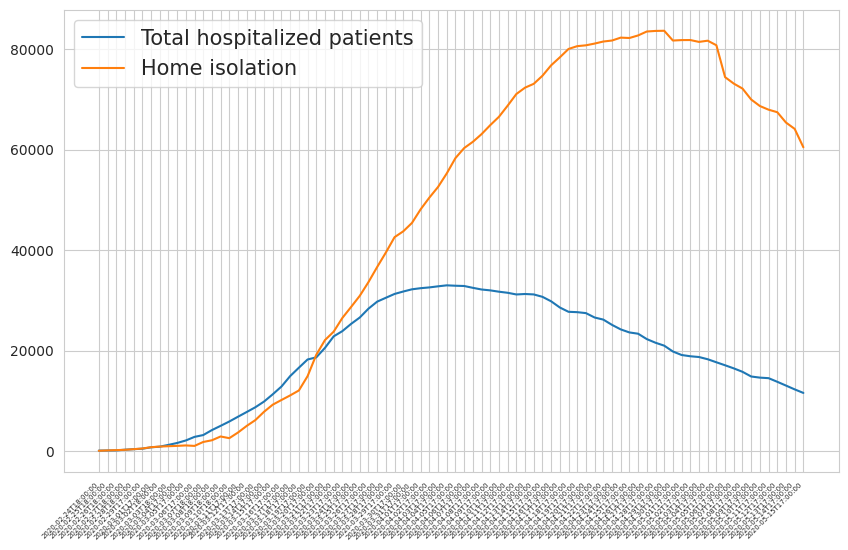

In [ ]:

plt.figure(figsize=(10,6))
plt.plot(covid_data.groupby("Date")["total_hospitalized_patients"].sum())
plt.plot(covid_data.groupby("Date")["home_isolation"].sum())
plt.xticks(rotation=45, ha='right')
plt.rcParams['xtick.labelsize']=5
plt.rcParams['ytick.labelsize']=10
plt.gca().legend(('Total hospitalized patients','Home isolation'), prop={'size': 15})
plt.show()



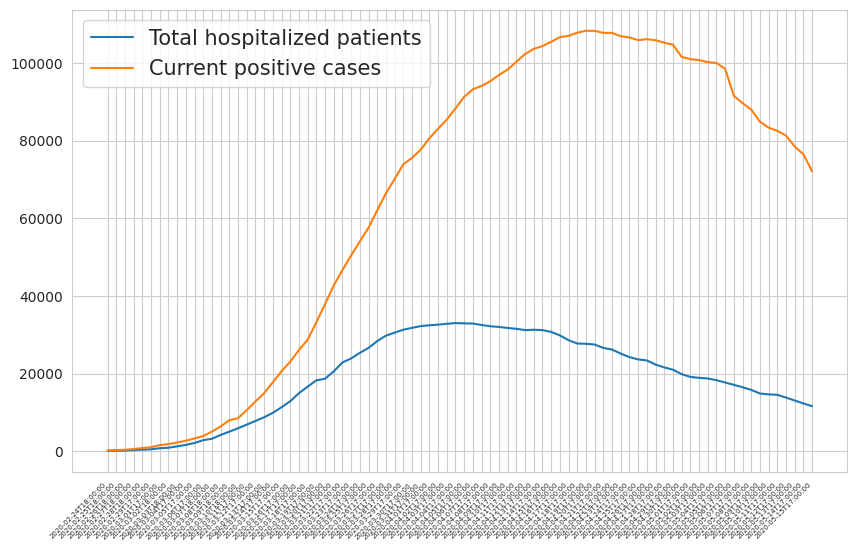

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(covid_data.groupby("Date")["total_hospitalized_patients"].sum())
plt.plot(covid_data.groupby("Date")["current_positive_cases"].sum())
plt.xticks(rotation=45, ha='right')
plt.rcParams['xtick.labelsize']=5
plt.rcParams['ytick.labelsize']=10
plt.gca().legend(('Total hospitalized patients','Current positive cases'), prop={'size': 15})
plt.show()

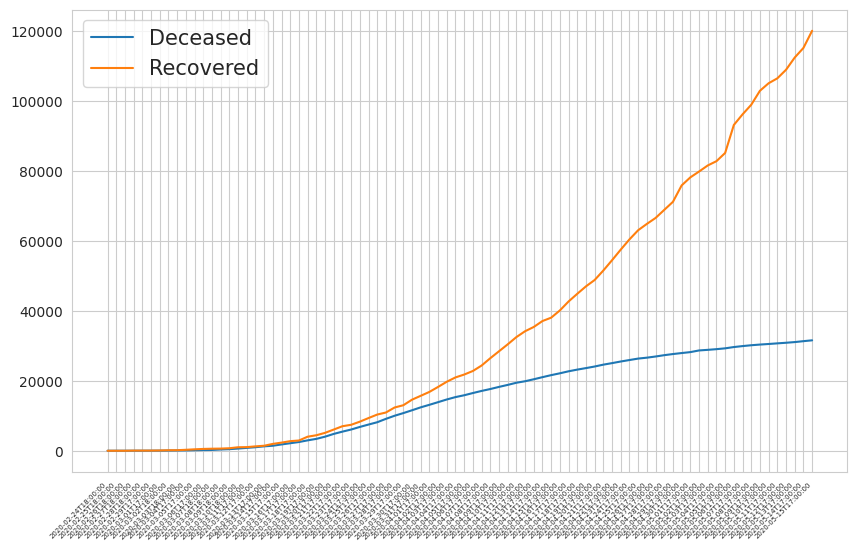

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(covid_data.groupby("Date")["deceased"].sum())
plt.plot(covid_data.groupby("Date")["recovered"].sum())
plt.xticks(rotation=45, ha='right')
plt.rcParams['xtick.labelsize']=5
plt.rcParams['ytick.labelsize']=10
plt.gca().legend(('Deceased','Recovered'), prop={'size': 15})
plt.show()

In [ ]:
last_row = covid_data.iloc[-1]


last_row.Date

'2020-05-15T17:00:00'

Seleziono i dati dell'ultimo giorno analizzato per vedere i valori totali

In [ ]:
final=covid_data[(covid_data == last_row.Date).any(axis=1)]

final

,Date,Region_code,Region_name,latitude,longitude,hospitalized_with_symptoms,intensive_care_petients,total_hospitalized_patients,home_isolation,current_positive_cases,change_in_total_positives,new_positive_cases,recovered,deceased,total_cases,tests_performed
1701,2020-05-15T17:00:00,13,Abruzzo,42.35122196,13.39843823,205,6,211,1243,1454,-28,12,1313,381,3148,54028
1702,2020-05-15T17:00:00,17,Basilicata,40.63947052,15.80514834,33,1,34,86,120,-7,0,242,27,389,20851
1703,2020-05-15T17:00:00,18,Calabria,38.90597598,16.59440194,56,2,58,447,505,-19,1,544,95,1144,52701
1704,2020-05-15T17:00:00,15,Campania,40.83956555,14.25084984,341,17,358,1378,1736,-29,15,2522,396,4654,131544
1705,2020-05-15T17:00:00,8,Emilia-Romagna,44.49436681,11.341720800000001,763,114,877,5124,6001,-300,54,17166,3943,27110,253497
1706,2020-05-15T17:00:00,6,Friuli Venezia Giulia,45.6494354,13.76813649,80,3,83,658,741,-29,14,2116,318,3175,100400
1707,2020-05-15T17:00:00,12,Lazio,41.89277044,12.48366722,1173,79,1252,2836,4088,-8,73,2672,604,7364,197599
1708,2020-05-15T17:00:00,7,Liguria,44.41149315,8.9326992,385,31,416,2187,2603,-57,65,5121,1336,9060,76012
1709,2020-05-15T17:00:00,3,Lombardia,45.46679409,9.190347404,4705,276,4981,22765,27746,-2210,299,40962,15411,84119,550405
1710,2020-05-15T17:00:00,11,Marche,43.61675973,13.5188753,178,18,196,2599,2795,-109,16,2847,977,6619,84351


In [ ]:
final.groupby("Region_name")["deceased"].sum()

Region_name
Abruzzo                    381
Basilicata                  27
Calabria                    95
Campania                   396
Emilia-Romagna            3943
Friuli Venezia Giulia      318
Lazio                      604
Liguria                   1336
Lombardia                15411
Marche                     977
Molise                      22
P.A. Bolzano               290
P.A. Trento                451
Piemonte                  3557
Puglia                     461
Sardegna                   125
Sicilia                    263
Toscana                    976
Umbria                      73
Valle d'Aosta              142
Veneto                    1762
Name: deceased, dtype: int64

<ipython-input-46-5dcee8c436d0>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  n.set_xticklabels(final['Region_name'].value_counts().index.sort_values(), rotation = 90, fontsize=12)


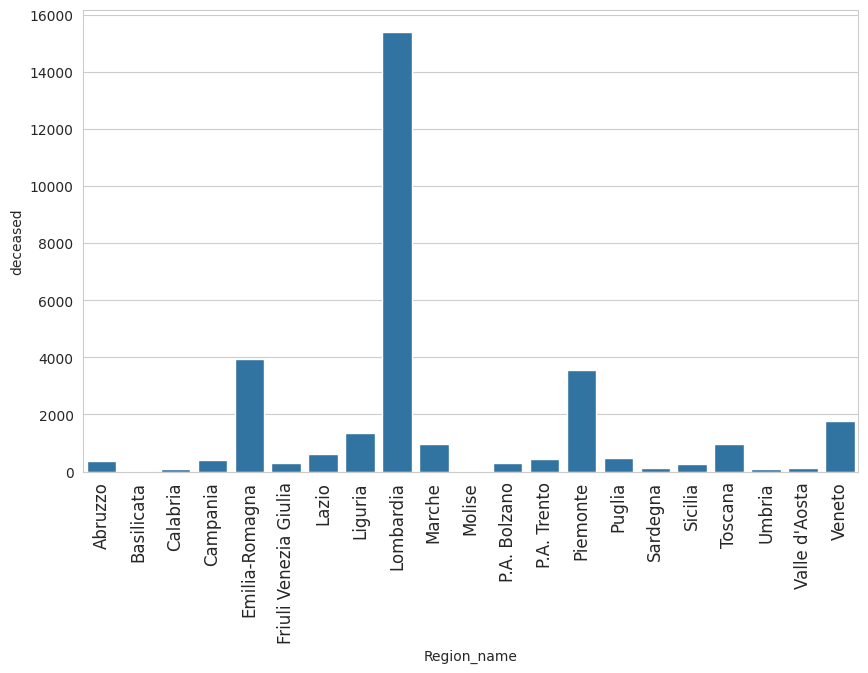

In [ ]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
n = sns.barplot(x=final['Region_name'].index, y=final.groupby("Region_name")["deceased"].sum())
n.set_xticklabels(final['Region_name'].value_counts().index.sort_values(), rotation = 90, fontsize=12)
n.set(xlabel ='Region_name', ylabel = 'deceased')
plt.show()

<ipython-input-47-7d1ee4f69910>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  n.set_xticklabels(final['Region_name'].value_counts().index.sort_values(), rotation = 90, fontsize=12)


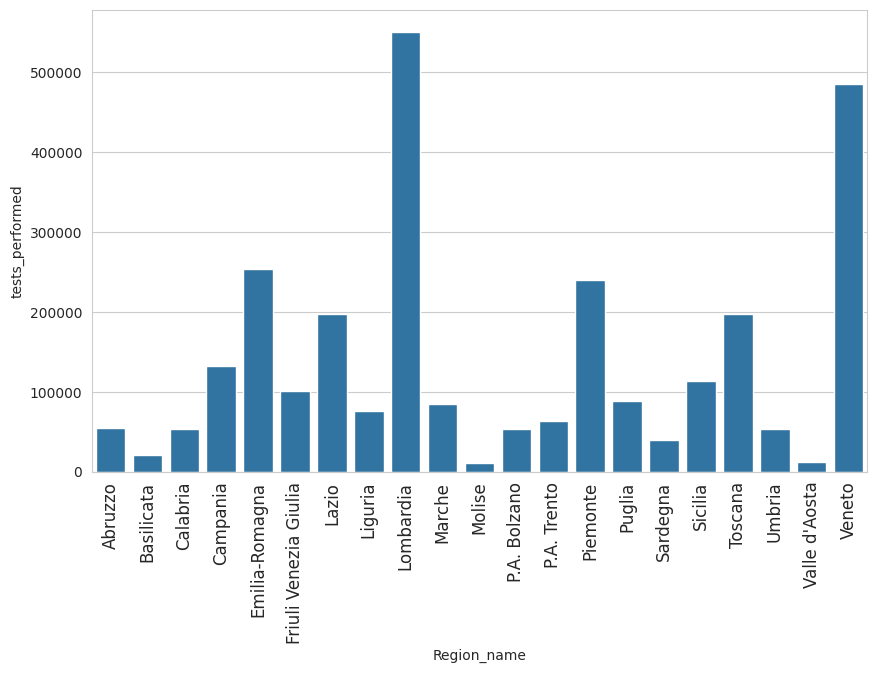

In [ ]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
n = sns.barplot(x=final['Region_name'].index, y=final.groupby("Region_name")["tests_performed"].sum())
n.set_xticklabels(final['Region_name'].value_counts().index.sort_values(), rotation = 90, fontsize=12)
n.set(xlabel ='Region_name', ylabel = 'tests_performed')
plt.show()

<ipython-input-49-b4238973d1a1>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  n.set_xticklabels(final['Region_name'].value_counts().index.sort_values(), rotation = 90, fontsize=12)


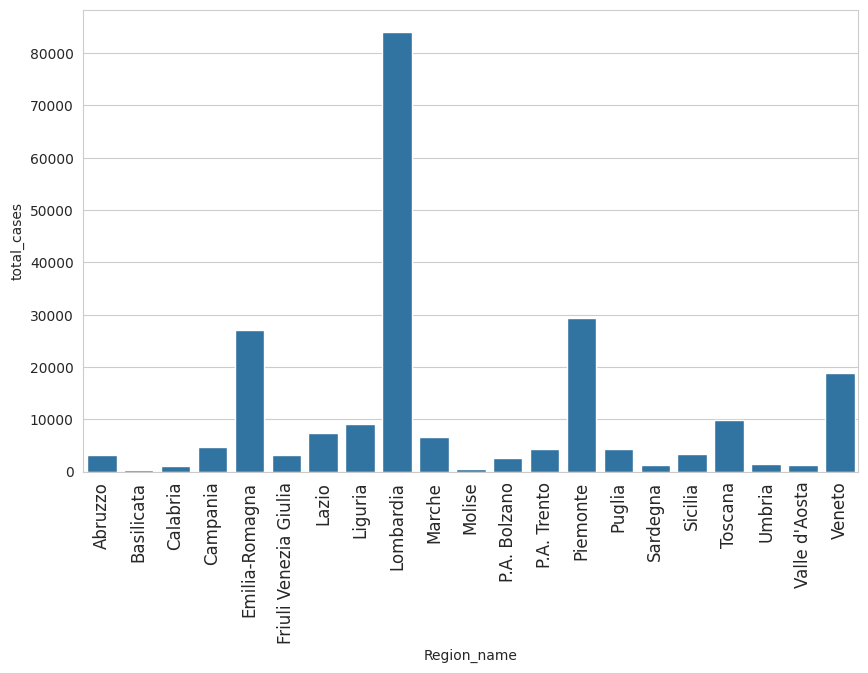

In [ ]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
n = sns.barplot(x=final['Region_name'].index, y=final.groupby("Region_name")["total_cases"].sum())
n.set_xticklabels(final['Region_name'].value_counts().index.sort_values(), rotation = 90, fontsize=12)
n.set(xlabel ='Region_name', ylabel = 'total_cases')
plt.show()

In [ ]:
covid_data.loc[covid_data['Region_name'] =='Veneto']

,Date,Region_code,Region_name,latitude,longitude,hospitalized_with_symptoms,intensive_care_petients,total_hospitalized_patients,home_isolation,current_positive_cases,change_in_total_positives,new_positive_cases,recovered,deceased,total_cases,tests_performed
20,2020-02-24T18:00:00,5,Veneto,45.43490485,12.33845213,12,4,16,16,32,0,32,0,1,33,2200
41,2020-02-25T18:00:00,5,Veneto,45.43490485,12.33845213,12,7,19,23,42,10,10,0,1,43,3780
62,2020-02-26T18:00:00,5,Veneto,45.43490485,12.33845213,16,8,24,45,69,27,28,0,2,71,4900
83,2020-02-27T18:00:00,5,Veneto,45.43490485,12.33845213,19,8,27,82,109,40,40,0,2,111,6164
104,2020-02-28T18:00:00,5,Veneto,45.43490485,12.33845213,24,9,33,116,149,40,40,0,2,151,7414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1637,2020-05-11T17:00:00,5,Veneto,45.43490485,12.33845213,400,38,438,5022,5460,-131,19,11615,1666,18741,445905
1658,2020-05-12T17:00:00,5,Veneto,45.43490485,12.33845213,393,33,426,4764,5190,-270,41,11906,1686,18782,454189
1679,2020-05-13T17:00:00,5,Veneto,45.43490485,12.33845213,364,30,394,4626,5020,-170,31,12081,1712,18813,463154
1700,2020-05-14T17:00:00,5,Veneto,45.43490485,12.33845213,342,26,368,4350,4718,-302,32,12384,1743,18845,474488


In [ ]:
covid_data.columns

Index(['Date', 'Region_code', 'Region_name', 'latitude', 'longitude',
       'hospitalized_with_symptoms', 'intensive_care_petients',
       'total_hospitalized_patients', 'home_isolation',
       'current_positive_cases', 'change_in_total_positives',
       'new_positive_cases', 'recovered', 'deceased', 'total_cases',
       'tests_performed'],
      dtype='object')

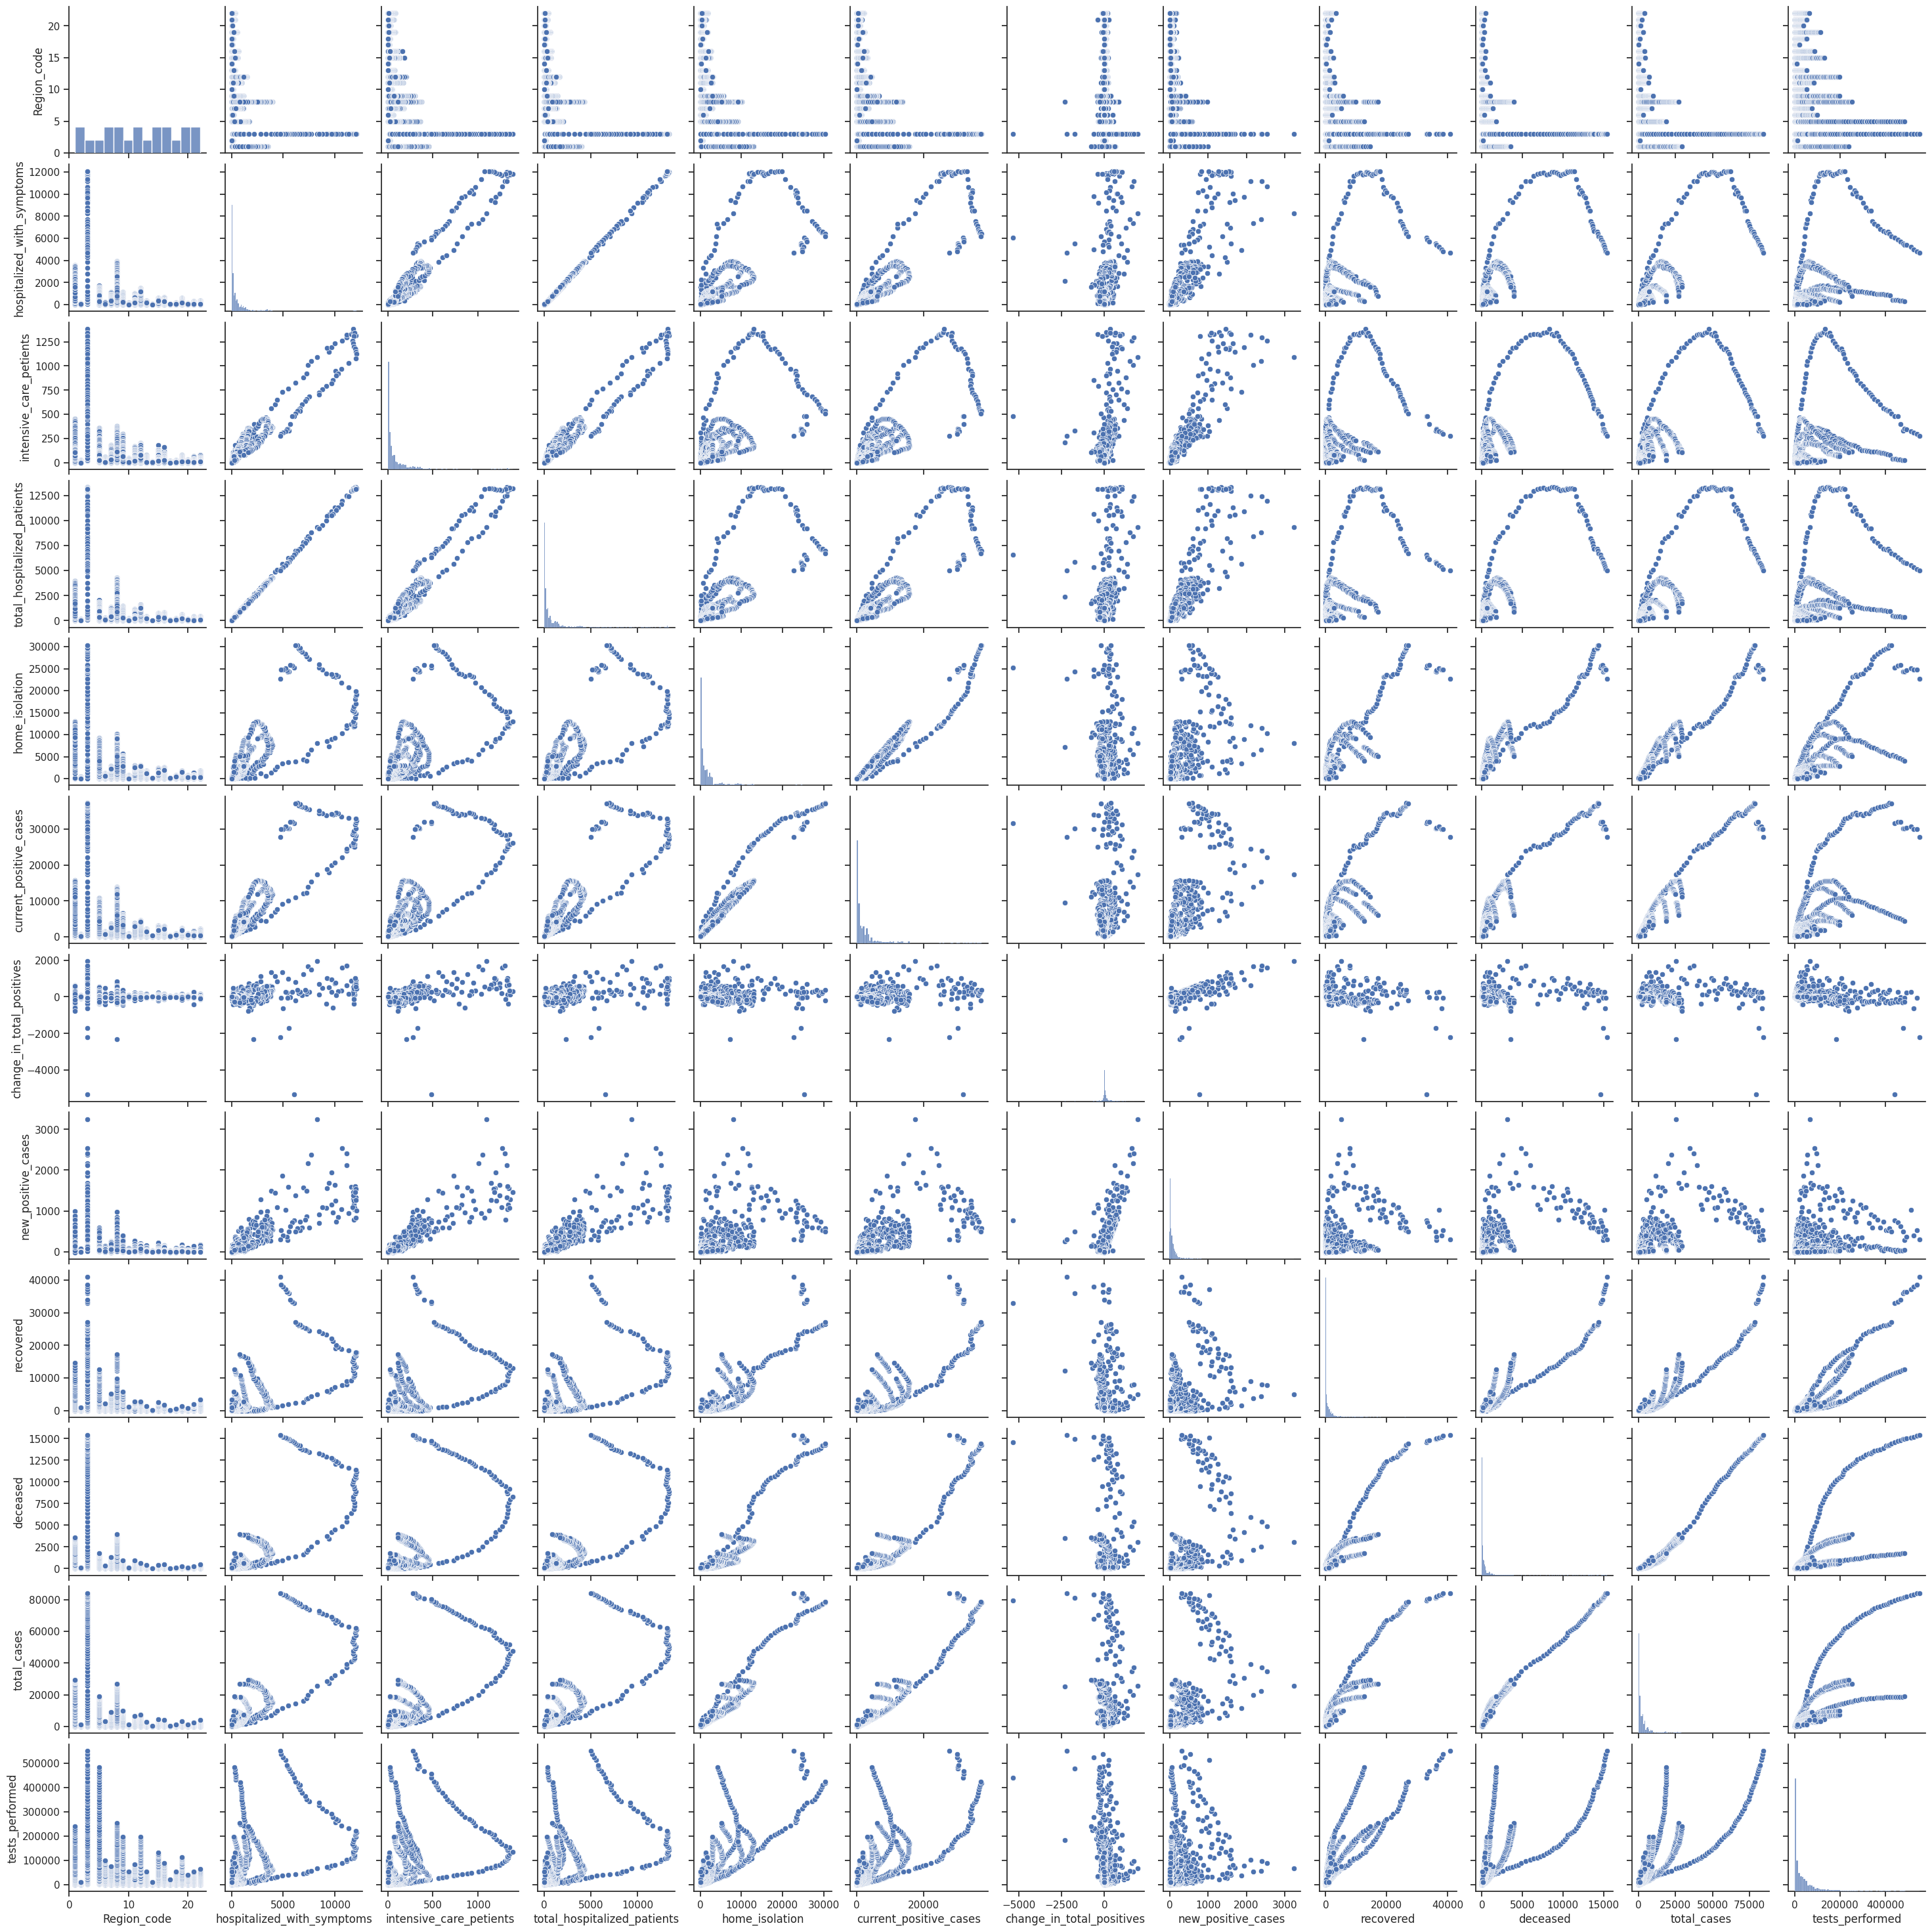

In [ ]:

sns.set(style="ticks", color_codes=True)
sns.pairplot(covid_data)
plt.show()

<ipython-input-25-6b741636f5f7>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = covid_data.corr()


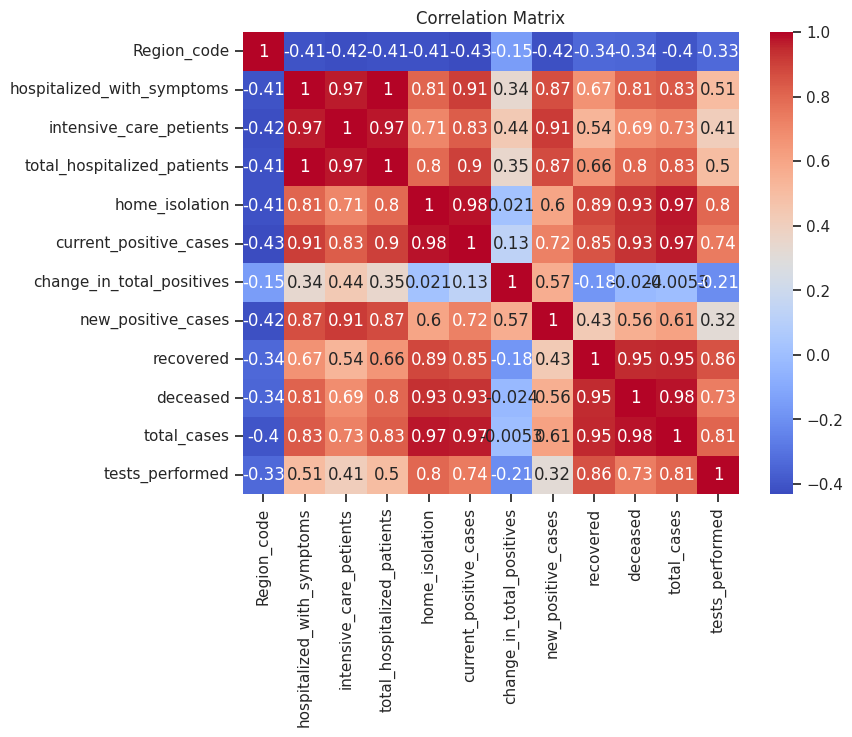

In [ ]:
#Correlation Matrix

plt.figure(figsize=(8,6))
correlation_matrix = covid_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
covid_data.to_csv(r'covid_ds.csv')